<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание проекта</a></span></li></ul></li><li><span><a href="#1.-Загрузка-данных" data-toc-modified-id="1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#3.-Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="3.-Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#4.-Кластеризация-клиентов" data-toc-modified-id="4.-Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Кластеризация клиентов</a></span></li><li><span><a href="#5.-Выводы-и-рекомендации" data-toc-modified-id="5.-Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. Выводы и рекомендации</a></span></li></ul></div>

# Основы машинного обучения

### Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.\
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов.\
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.\
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.\
А именно:\
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;\
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;\
проанализировать основные признаки, наиболее сильно влияющие на отток;\
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;\
2) предложить меры по снижению оттока;\
3) определить другие особенности взаимодействия с клиентами.

## 1. Загрузка данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Загрузим данные из файла *gym_churn.csv* и сохраним в переменной **gym**

In [ ]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [ ]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Описание данных
Данные клиента за предыдущий до проверки факта оттока месяц:
- `'gender'` — пол;
- `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
- `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `'Phone'` — наличие контактного телефона;
- `'Age'` — возраст;
- `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
- `'Group_visits'` — факт посещения групповых занятий;
- `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
- `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `'Churn'` — факт оттока в текущем месяце.

## Исследовательский анализ данных (EDA)

Посмотрим общую информацию о данных, проверим на дубликаты

In [ ]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
print('Количество дубликатов:', gym.duplicated().sum())

Количество дубликатов: 0


Изучим средние значения и стандартные отклонения

In [ ]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим на средние значения признаков в двух группах — тех, кто остался (0) и тех кто ушел в отток (1)

In [ ]:
gym_churn = gym.groupby(['Churn']).mean()
gym_churn.T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Построим гистограммы признаков для тех, кто ушёл в отток и тех, кто остался

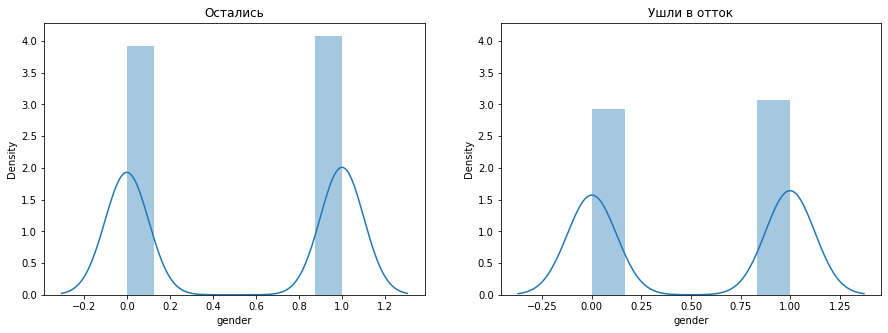

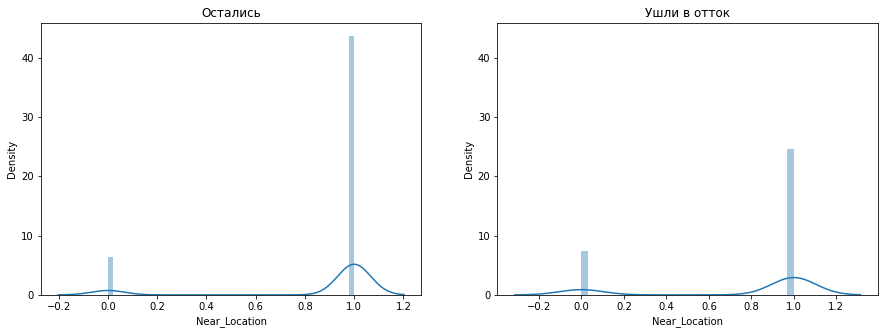

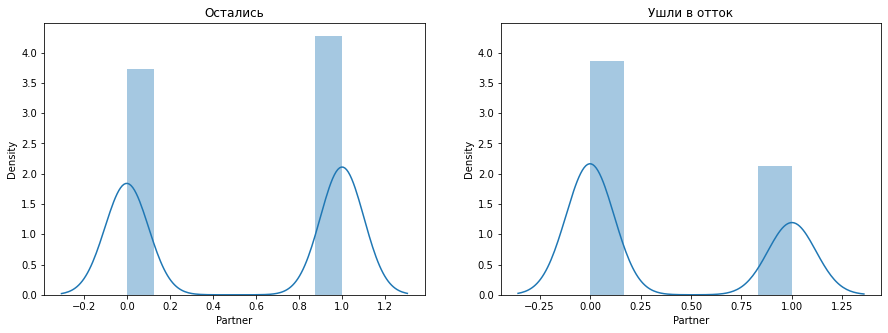

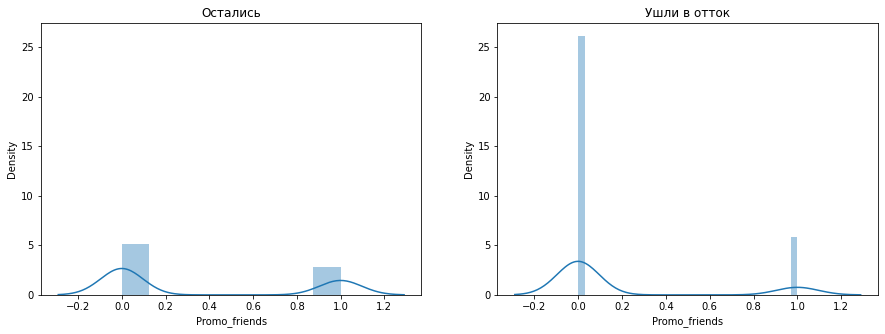

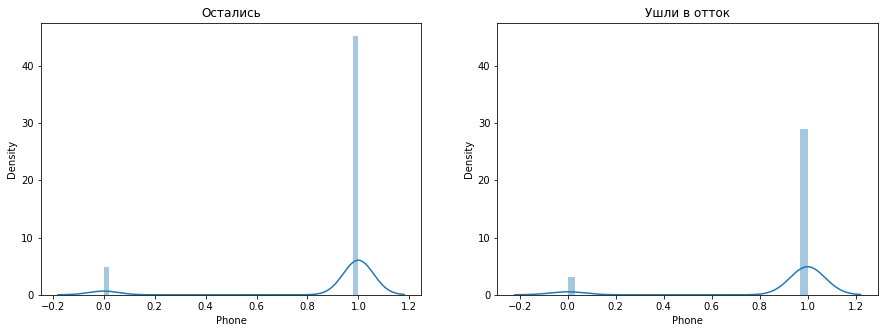

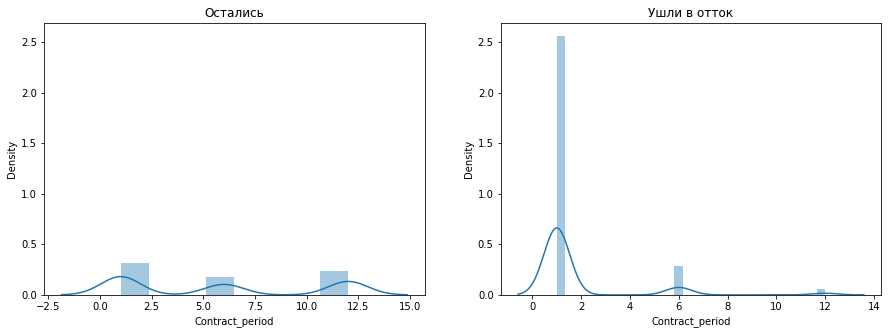

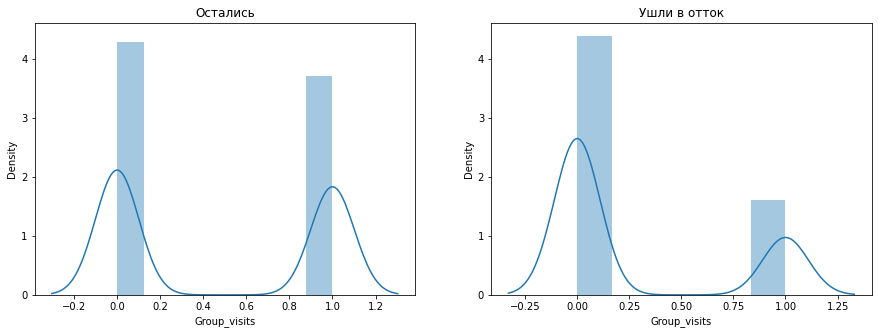

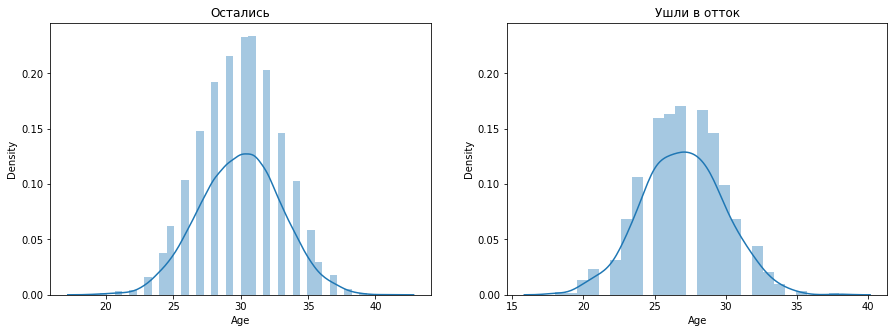

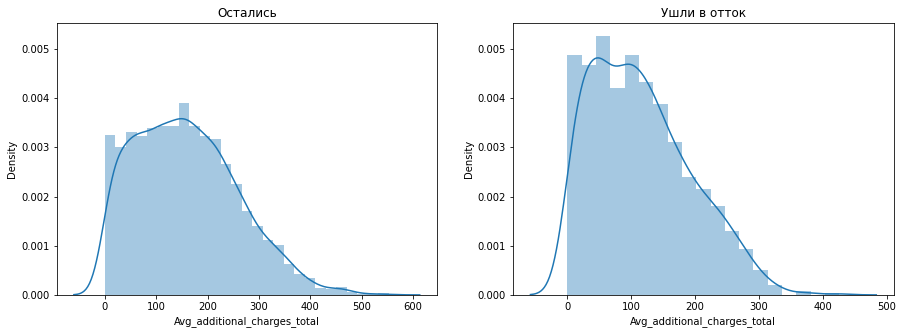

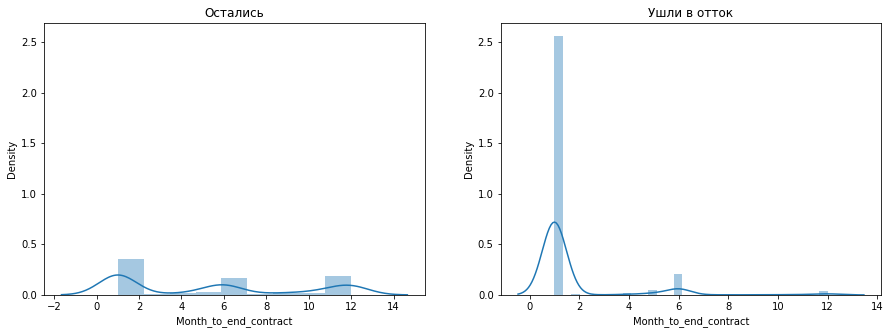

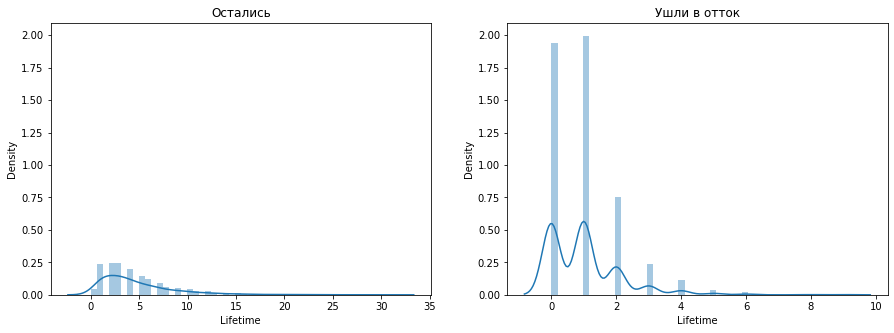

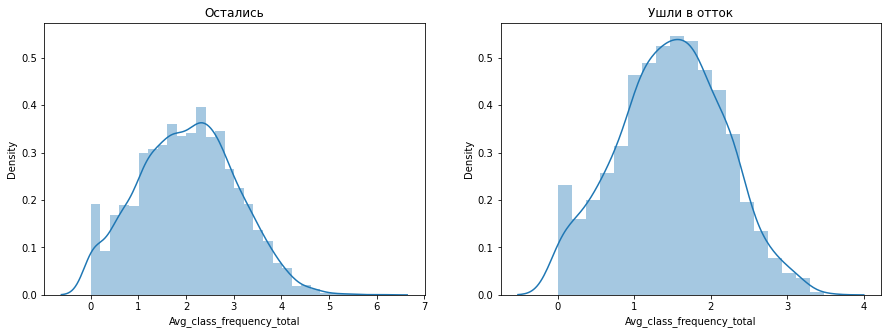

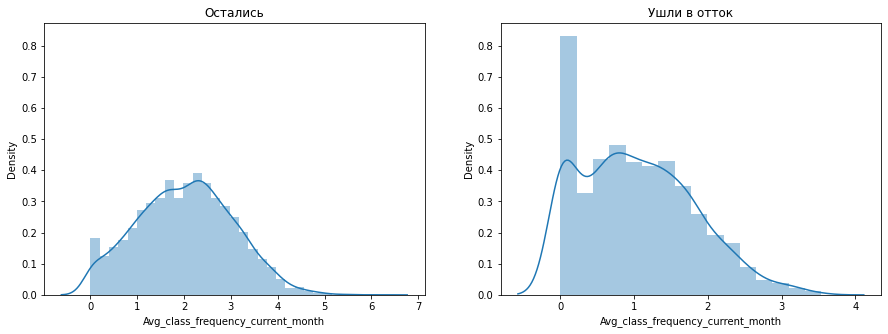

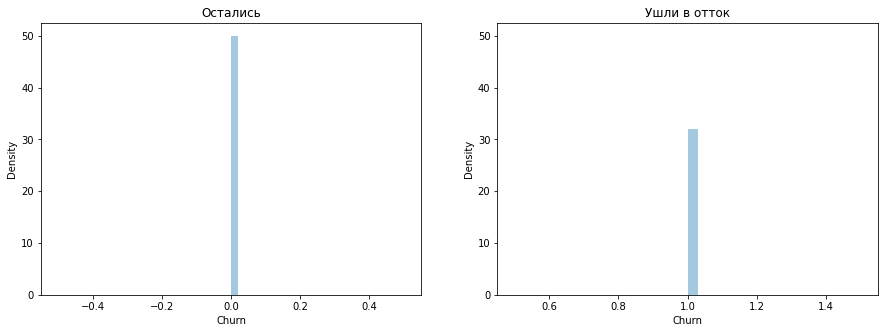

In [ ]:
warnings.filterwarnings('ignore')
for name in gym.columns:
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    sns.distplot(gym.query('Churn == 0')[name], ax=ax1)
    plt.title('Остались')
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    sns.distplot(gym.query('Churn == 1')[name], ax=ax2)
    plt.title('Ушли в отток')
    plt.show()

Построим матрицу корреляций и отобразим

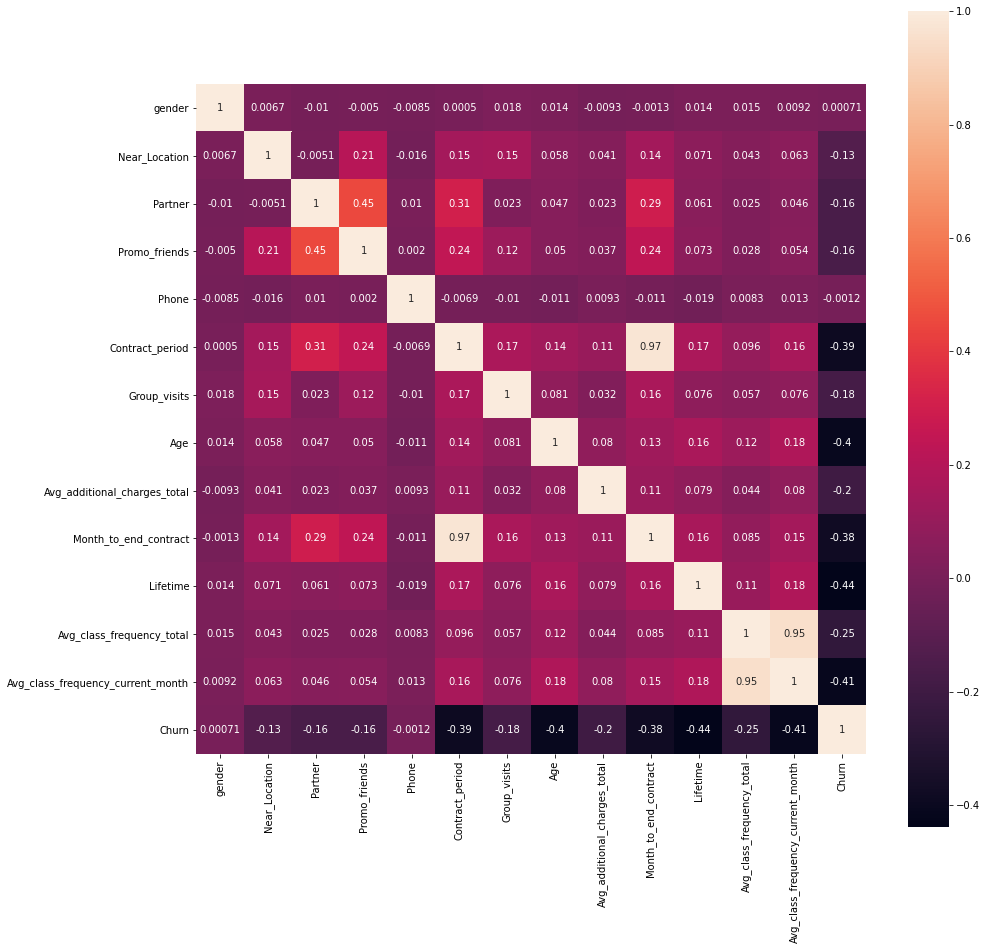

In [ ]:
corr_m = gym.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True)
plt.show()

- Пропуски и дубликаты отсутствуют, тип данных соответствующий
- Выбросов и аномальных значений не наблюдается


- Большая часть тех кто ушел в отток не сотрудники компаний-партнёров клуба и записались не в рамках акции "приведи друга"
- Большинство тех кто ушел в отток покупали абонемент на 1 месяц
- Большинство тех кто ушел в отток не посещали групповые занятия
- Те кто ушел в отток несколько меньше тратились на другие услуги фитнес-клуба
- Большая часть тех кто ушел в отток посещали фитнес-клуб не более месяца с момента первого обращения
- Средняя частота посещений в неделю за все время с начала действия абонемента у тех кто ушел в отток ниже чем у тех кто остался и много таких кто не посещал фитнес-клуб в предыдущий месяц


- Наблюдается сильная корреляция признаков в столбцах `Contract_period` и `Month_to_end_contract` — 0,97 и в столбцах`Avg_class_frequency_total` и `Avg_class_frequency_current_month` — 0,95. Поэтому при построении матрицы признаков (X) исключим столбцы `Month_to_end_contract` и `Avg_class_frequency_current_month`.

## 3. Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где **y** — целевая переменная, факт оттока клиента в следующем месяце\
**X** — матрица признаков\
Разобьем данные на обучающую и валидационную выборку, (**X_train, y_train**) и (**X_test, y_test**) соответственно

In [ ]:
X = gym.drop(['Churn', 'Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1)
y = gym['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

Обучим модель на train-выборке двумя способами:
- логистической регрессией

In [ ]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
probabilities = lr_model.predict_proba(X_test)[:,1]

- случайным лесом

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Оценим метрики `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке. Сравним по ним модели
- логистическая регрессия

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_lr)))

Accuracy: 0.89
Precision: 0.79
Recall: 0.80


- случайный лес

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf)))

Accuracy: 0.89
Precision: 0.81
Recall: 0.79


- В нашем случае наиболее важной является метрика `Precision` (точность), т.к. точнее выявляет клиентов склонных к оттоку. У модели "случайный лес" она выше, поэтому модель "случайный лес" показала себя лучше

## 4. Кластеризация клиентов

Построим матрицу прихнаков **X_1** без столбца `Churn`

In [ ]:
X_1 = gym.drop(['Churn'], axis=1)

Стандартизируем данные в матрице **X_1**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_1)
X_sc = scaler.transform(X_1)

Построим матрицу расстояний на стандартизованной матрице признаков **X_sc** и нарисуем дендрограмму

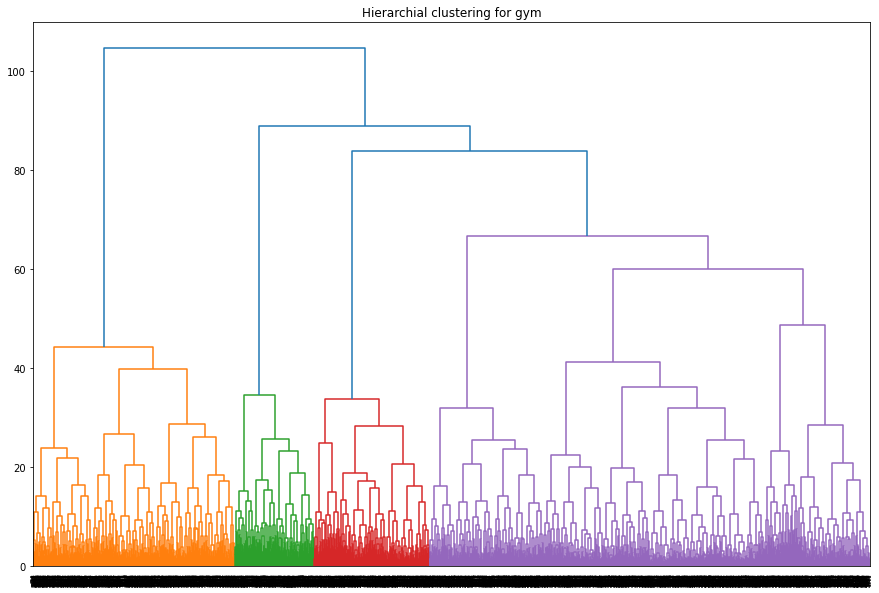

In [ ]:
linked = linkage(X_sc, method='ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for gym')
plt.show()

На основании полученного графика количество кластеров примем равным 5\
Обучим модель кластеризации на основании алгоритма **K-Means** и спрогнозируем кластеры клиентов

In [ ]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

В таблицу данных **gym** добавим столбец `cluster` — кластер клиентов, и посмотрим на средние значения признаков для кластеров

In [ ]:
gym['cluster'] = labels
clasters = gym.groupby(['cluster']).mean()
clasters.T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


- В кластер 2 попали клиенты не проживающие и не работающие в районе, где находится фитнес-центр
- В кластер 1 попали клиенты без наличия контактного телефона
- В кластер 0 попали клиенты с большей длительностью текущего действующего абонемента и большим  сроком до окончания текущего действующего абонемента
- В кластер 4 попали клиенты с большей средней частотой посещений в неделю
- В кластер 3 попали клиенты с низким значением посещаемости фитнес-клуба

Построим гистограммы признаков для кластеров

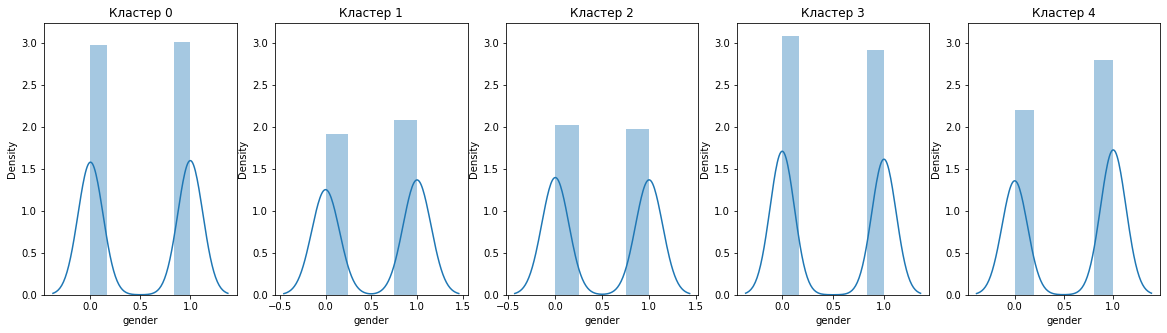

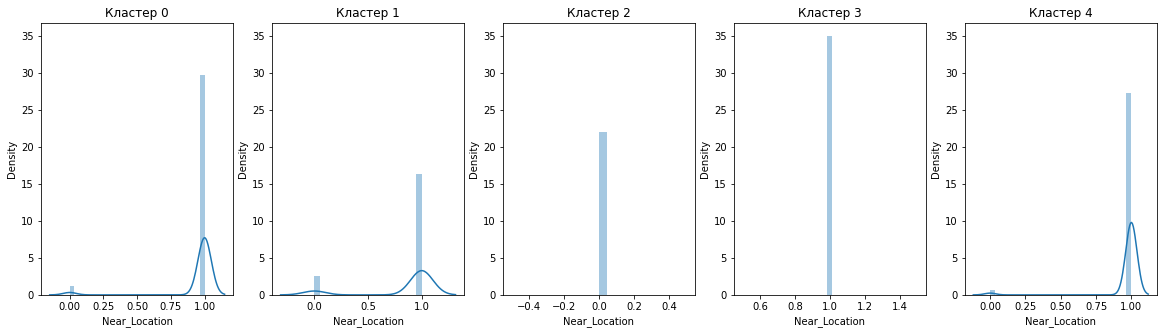

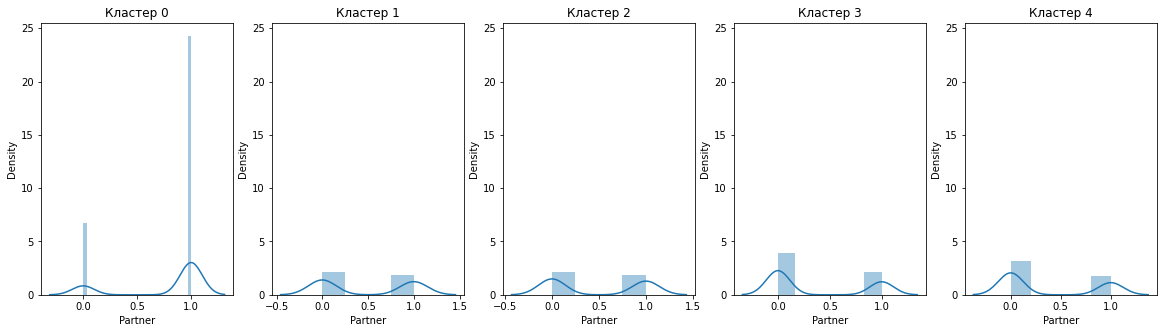

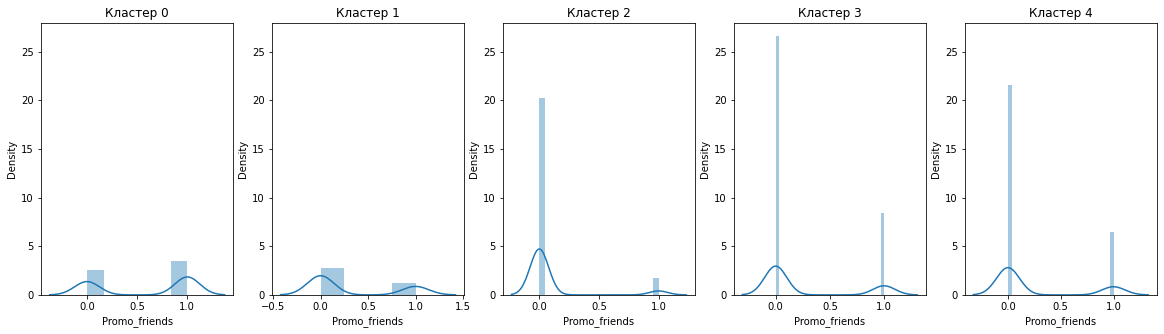

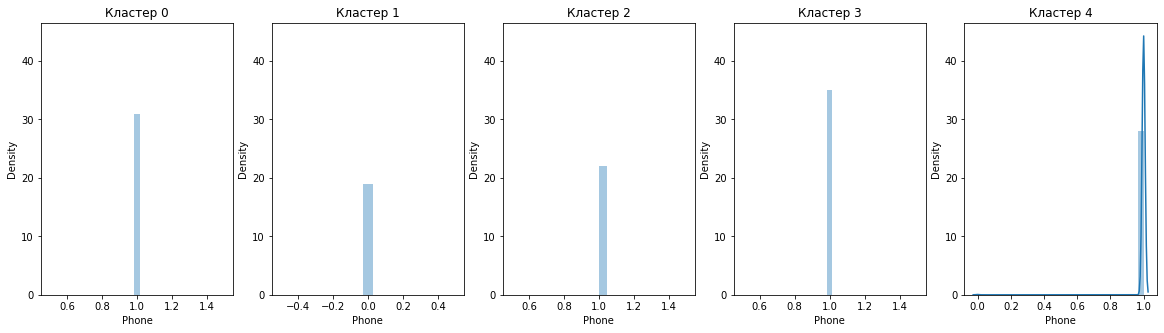

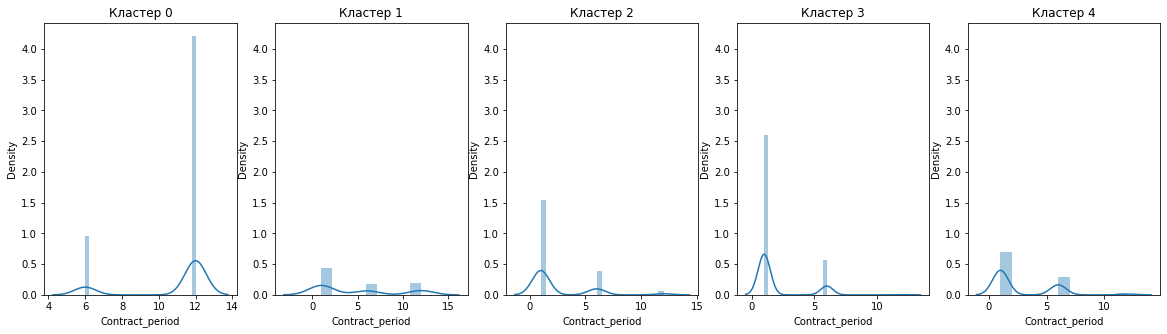

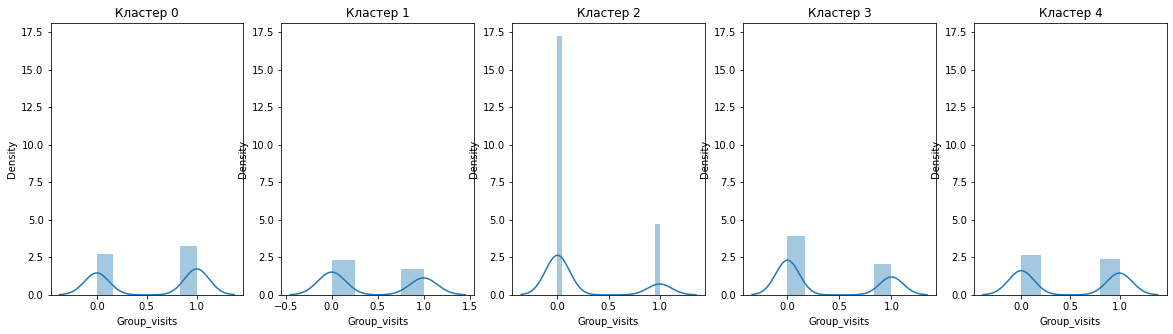

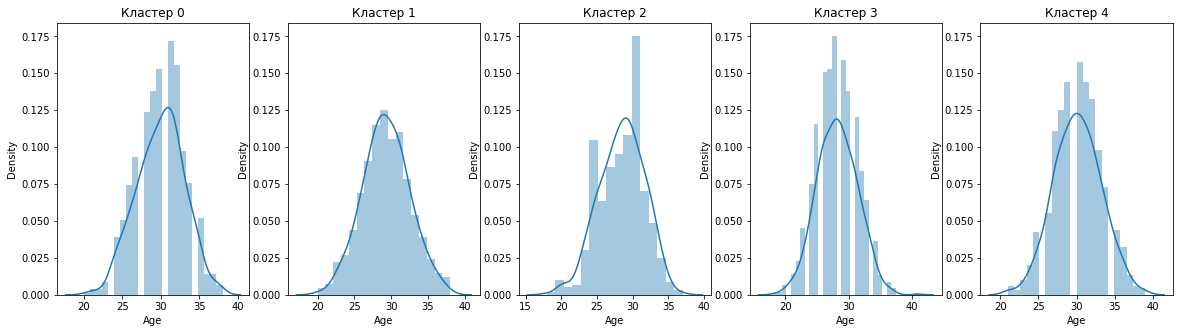

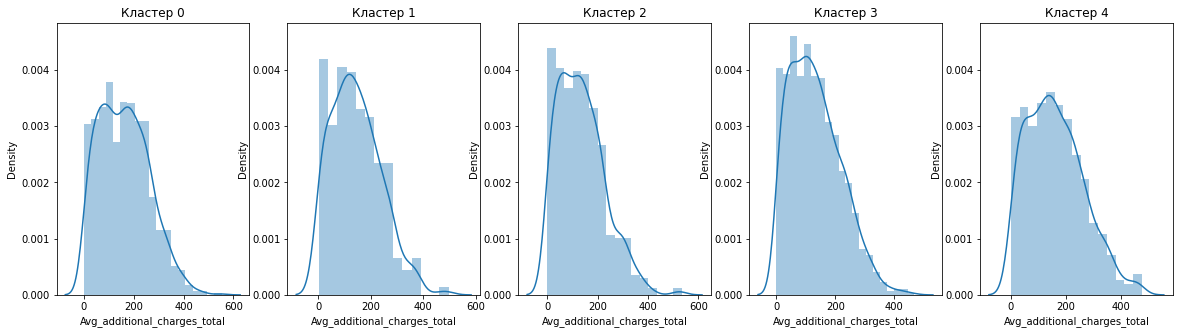

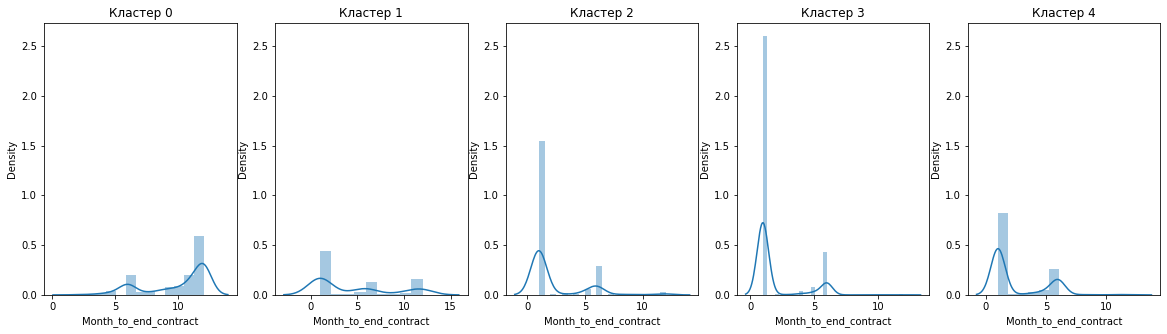

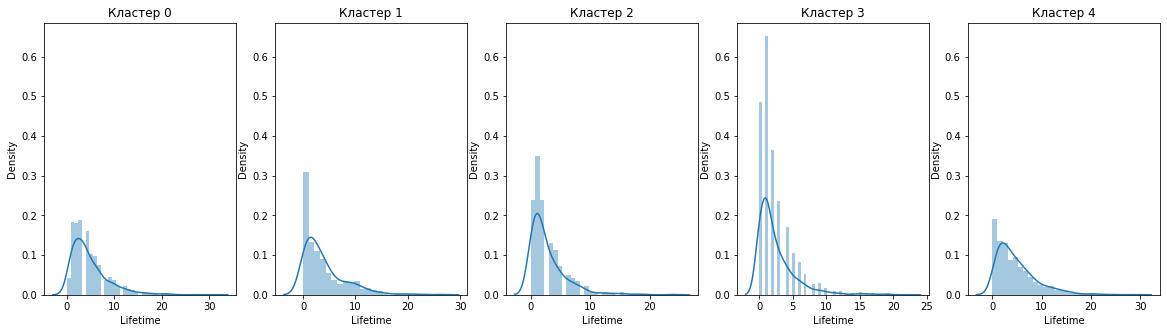

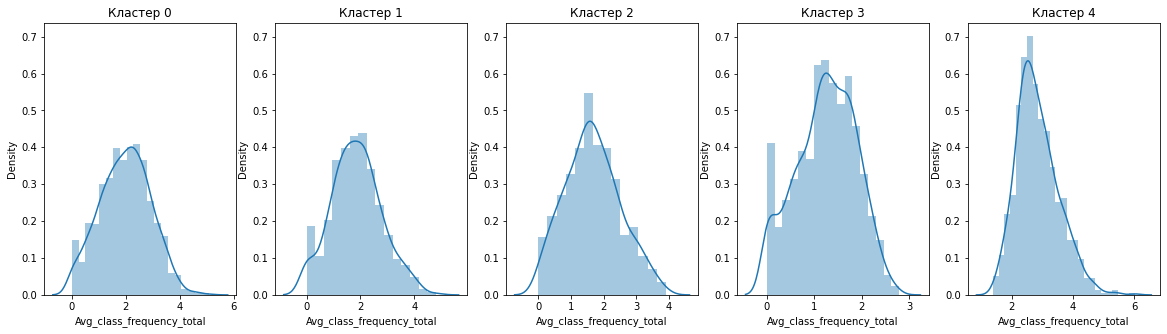

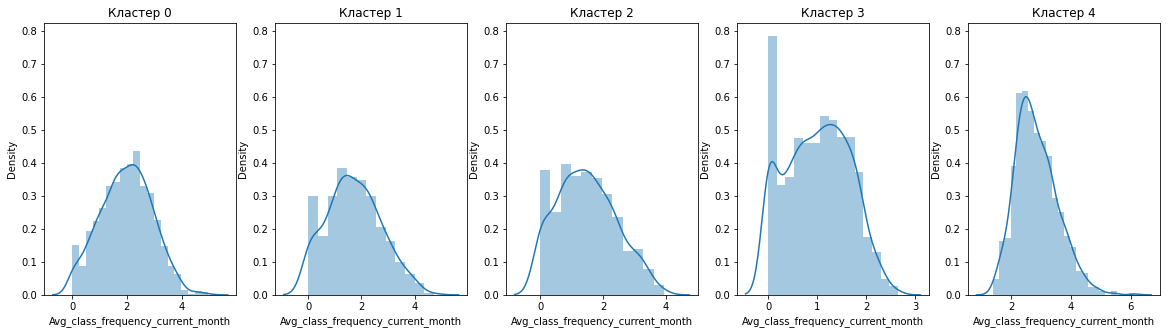

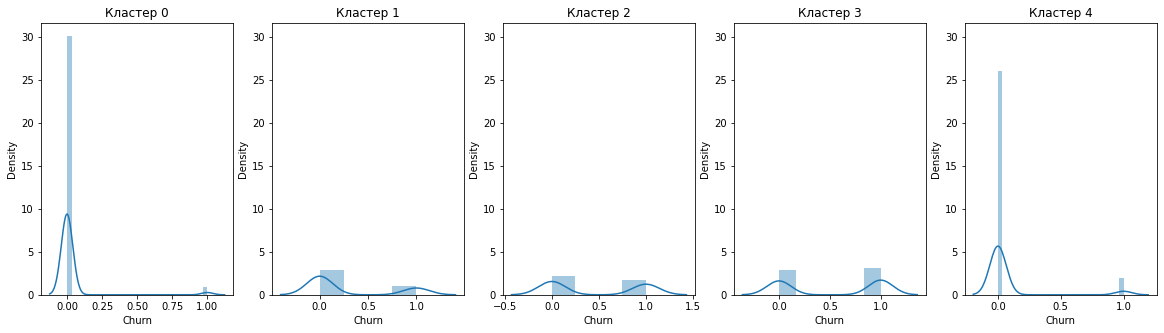

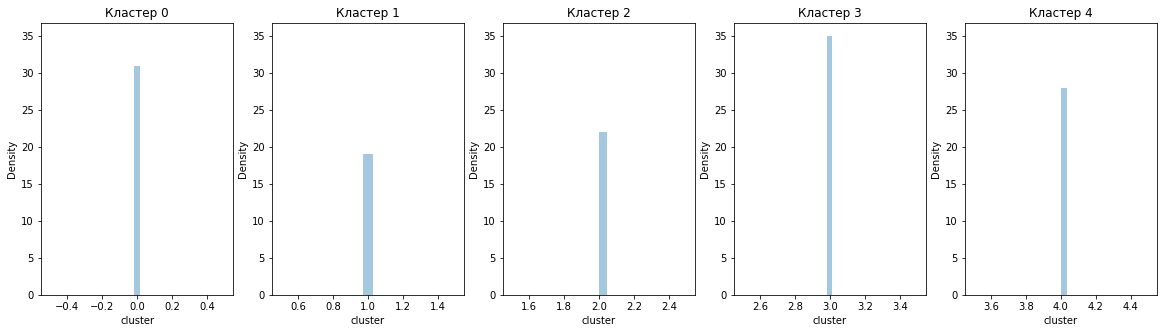

In [ ]:
warnings.filterwarnings('ignore')
for name in gym.columns:
    plt.figure(figsize=(20, 5))
    ax1 = plt.subplot(1, 5, 1)
    sns.distplot(gym.query('cluster == 0')[name], ax=ax1)
    plt.title('Кластер 0')
    ax2 = plt.subplot(1, 5, 2, sharey=ax1)
    sns.distplot(gym.query('cluster == 1')[name], ax=ax2)
    plt.title('Кластер 1')
    ax3 = plt.subplot(1, 5, 3, sharey=ax1)
    sns.distplot(gym.query('cluster == 2')[name], ax=ax3)
    plt.title('Кластер 2')
    ax4 = plt.subplot(1, 5, 4, sharey=ax1)
    sns.distplot(gym.query('cluster == 3')[name], ax=ax4)
    plt.title('Кластер 3')
    ax5 = plt.subplot(1, 5, 5, sharey=ax1)
    sns.distplot(gym.query('cluster == 4')[name], ax=ax5)
    plt.title('Кластер 4')
    plt.show()

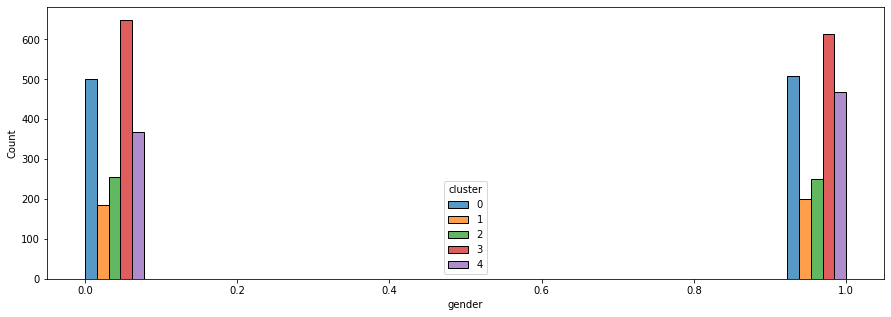

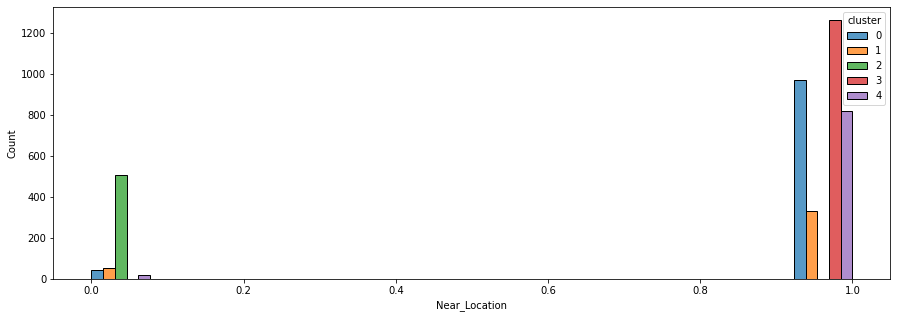

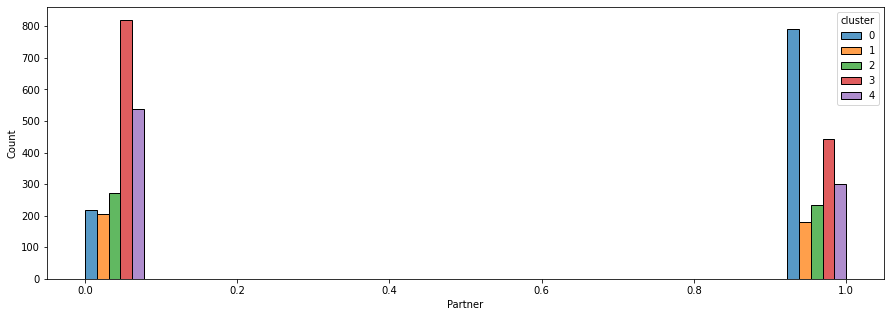

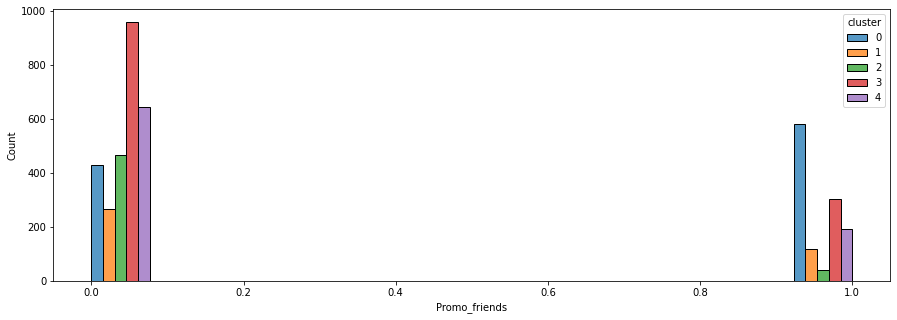

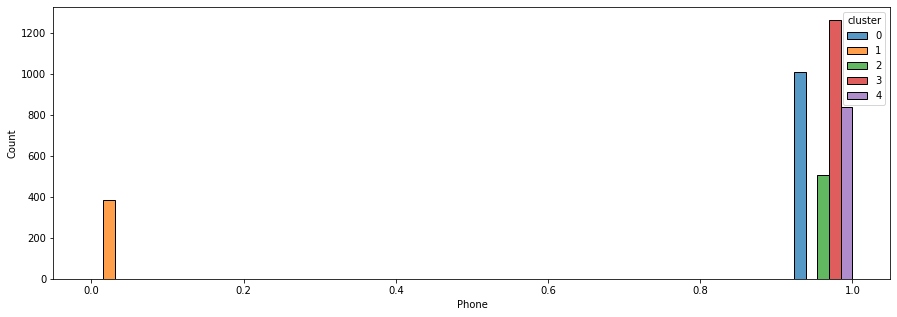

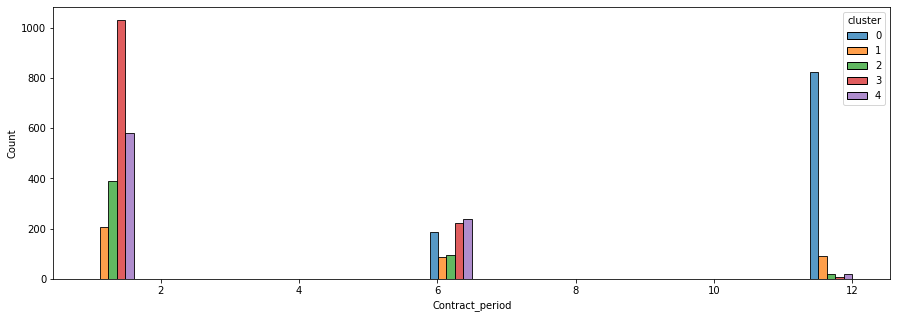

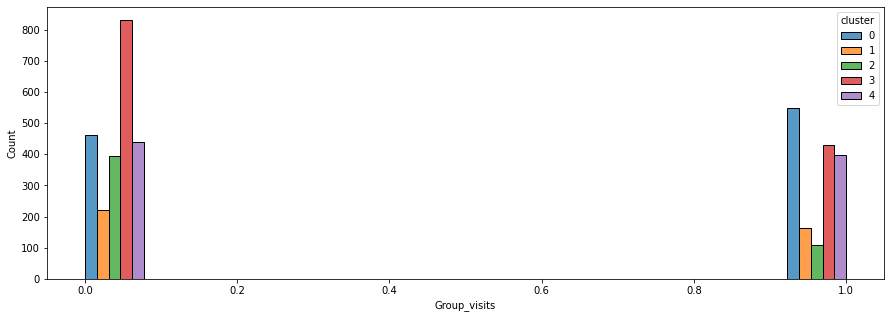

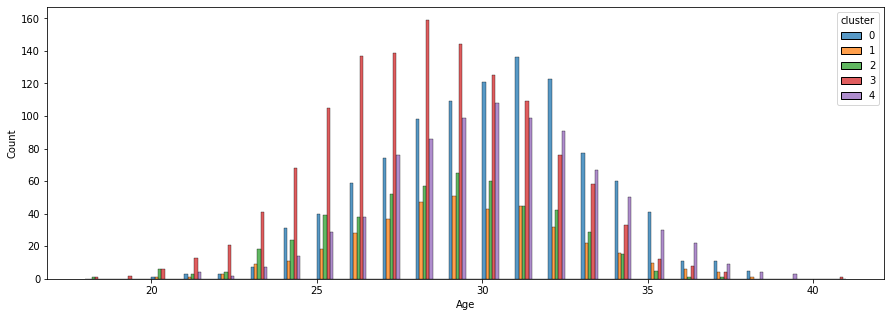

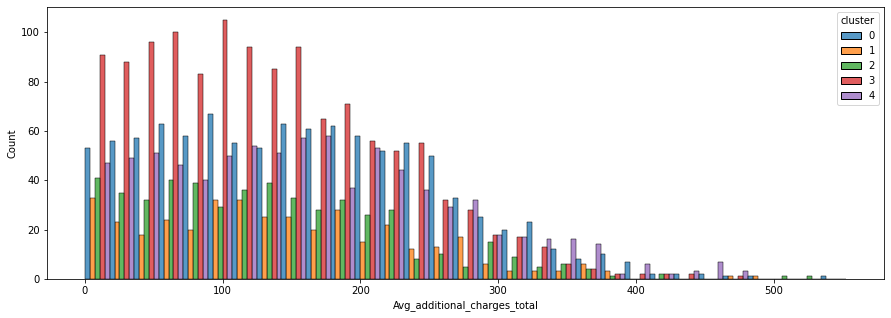

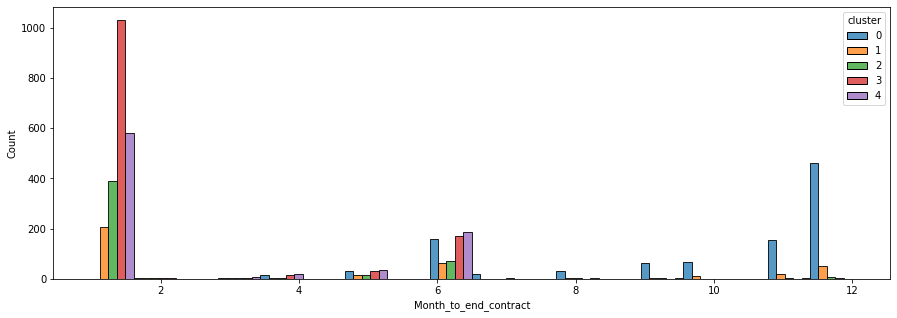

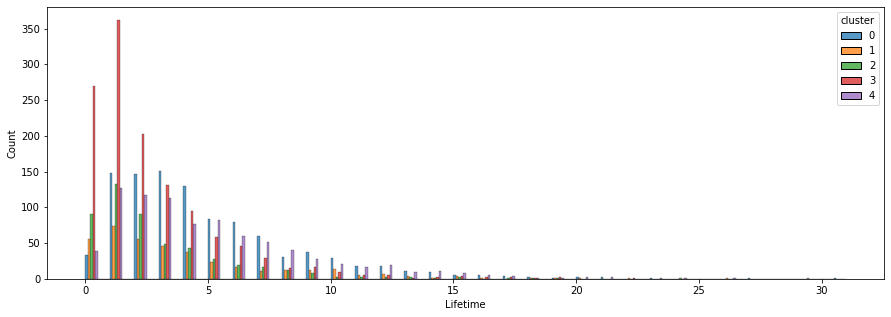

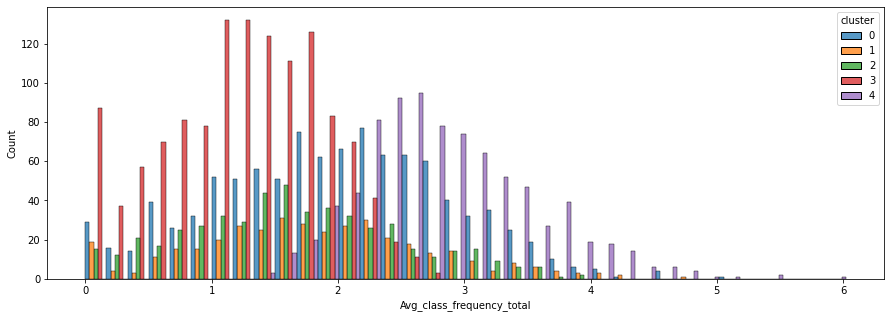

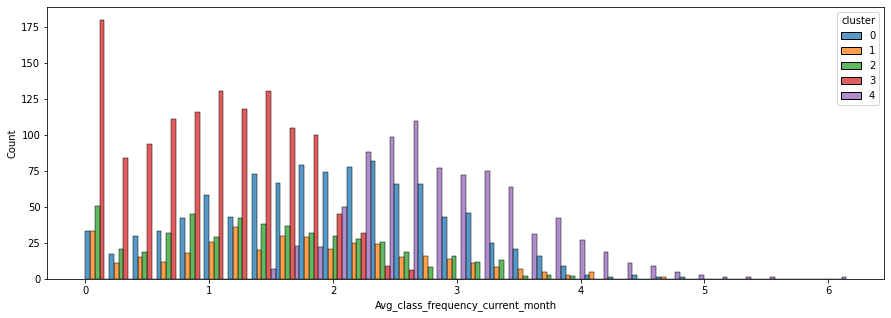

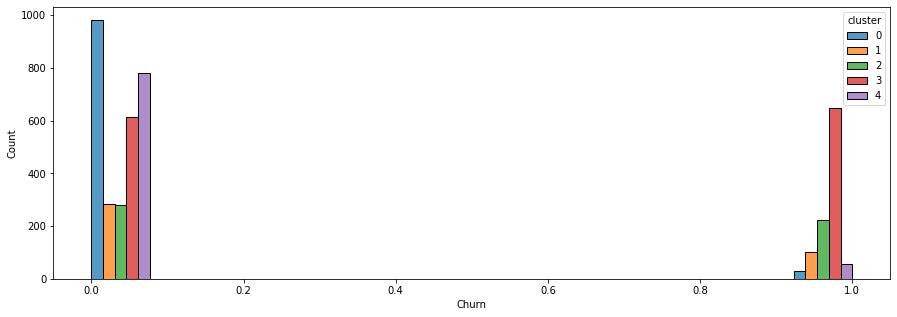

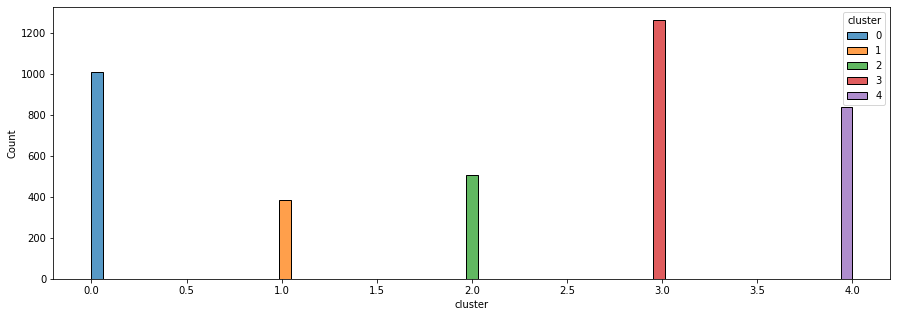

In [ ]:
for name in gym.columns:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=gym, x=name, hue="cluster", multiple='dodge', palette='tab10')
    plt.show()

- В кластере 0 большинство клиентов сотрудники компаний-партнёров клуба
- В кластерах 2, 3 и 4 большинство клиентов записались в рамках акции «приведи друга»
- В кластере 2 большинство клиентов посещают групповые занятия
- В кластере 2 и 3 большинство клиентов приобрели абонемент на 1 месяц и сроком до окончания текущего действующего абонемента не более месяца
- В кластере 3 больше всего клиентов со средней частотой посещений в неделю за предыдущий месяц равной 0

Для каждого кластера посчитаем долю оттока

In [ ]:
clasters_churn = gym.groupby(['cluster']).agg({'Churn': 'mean'})
clasters_churn

,Churn
cluster,
0,0.027723
1,0.267532
2,0.443564
3,0.514263
4,0.068019


- Менее всего склонны к оттоку кластеры 0 и 4
- На втором месте кластер 1
- Более всего склонны к оттоку кластеры 2 и 3

## 5. Выводы и рекомендации

- Большая часть тех кто ушел в отток не сотрудники компаний-партнёров клуба и записались не в рамках акции "приведи друга"
- Большинство тех кто ушел в отток покупали абонемент на 1 месяц
- Большинство тех кто ушел в отток не посещали групповые занятия
- Те кто ушел в отток несколько меньше тратились на другие услуги фитнес-клуба
- Большая часть тех кто ушел в отток посещали фитнес-клуб не более месяца с момента первого обращения
- Средняя частота посещений в неделю за все время с начала действия абонемента у тех кто ушел в отток ниже чем у тех кто остался и много таких кто не посещал фитнес-клуб в предыдущий месяц


- В кластер 2 попали клиенты не проживающие и не работающие в районе, где находится фитнес-центр
- В кластер 1 попали клиенты без наличия контактного телефона
- В кластер 0 попали клиенты с большей длительностью текущего действующего абонемента и большим  сроком до окончания текущего действующего абонемента
- В кластер 4 попали клиенты с большей средней частотой посещений в неделю
- В кластер 3 попали клиенты с низким значением посещаемости фитнес-клуба


- В кластере 0 большинство клиентов сотрудники компаний-партнёров клуба
- В кластерах 2, 3 и 4 большинство клиентов записались в рамках акции «приведи друга»
- В кластере 2 большинство клиентов посещают групповые занятия
- В кластере 2 и 3 большинство клиентов приобрели абонемент на 1 месяц и сроком до окончания текущего действующего абонемента не более месяца
- В кластере 3 больше всего клиентов со средней частотой посещений в неделю за предыдущий месяц равной 0


- Менее всего склонны к оттоку кластеры 0 и 4
- На втором месте кластер 1
- Более всего склонны к оттоку кластеры 2 и 3

Общий вывод:
- Большинство клиентов которые попали в отток не сотрудники компаний-партнёров клуба и записались не в рамках акции "приведи друга". В основном это люди купившие абонемент на один месяц и не посещавшие групповые занятия. Также среднее количество посещений в неделю у них менее двух раз и в последнюю неделю часто равно 0

Основные рекомендации по удержанию клиентов:
- Поддержание интереса к тренировкам, например, при помощи собственного инфополя. Полезные рецепты, советы тренеров и т.д.
- Внедрить систему поощрения: персональные тренировки, оценка физической формы, пробные групповые занятия и т.д.
- Для удержания клиентов важно дать им мотивацию приводить в клуб своих друзей, например при помощи различных бонусов
- Настроить систему уведомлений, периодически напоминать участникам о выгоде посещения тренировок или возможных привилегиях, которые они упускают